# xDeepFM : the eXtreme Deep Factorization Machine 
This notebook will give you a quick example of how to train an [xDeepFM model](https://arxiv.org/abs/1803.05170). 
xDeepFM \[1\] is a deep learning-based model aims at capturing both lower- and higher-order feature interactions for precise recommender systems. Thus it can learn feature interactions more effectively and manual feature engineering effort can be substantially reduced. To summarize, xDeepFM has the following key properties:
* It contains a component, named CIN, that learns feature interactions in an explicit fashion and in vector-wise level; <b>Compressed Interaction Network</b>
* It contains a traditional DNN component that learns feature interactions in an implicit fashion and in bit-wise level.
* The implementation makes this model quite configurable. We can enable different subsets of components by setting hyperparameters like `use_Linear_part`, `use_FM_part`, `use_CIN_part`, and `use_DNN_part`. For example, by enabling only the `use_Linear_part` and `use_FM_part`, we can get a classical FM model.

In this notebook, we test xDeepFM on the Amazon Electronics reviews dataset

One major type of feature transformation is the <b>cross-product transformation over categorical
features</b>. These features are called cross features or multi-way features, they measure the interactions of multiple raw features. For instance, a 3-way feature AND(user_organization=msra,
item_category=deeplearning, time=monday) has value 1 if the user works at Microsoft Research Asia and is shown a technical article about deep learning on a Monday.

#### Global Settings and Imports

In [1]:
import sys
sys.path.append('../../../recommenders/') # if needed adjust the path to the Microsoft Recommenders clone

In [2]:
# adjust the paths to the data shared on the Google drive
AMZN_DATA_DIR = '/home/shiv/Documents/DataScience/Capstone/Data/'
DATA_DIR = '/home/shiv/Documents/DataScience/Capstone/Data/xdeepfm/'
YAML_DIR = '/home/shiv/Documents/DataScience/Capstone/Modeling/xdeepfm/config/'
MODEL_DIR = '/home/shiv/Documents/DataScience/Capstone/Modeling/xdeepfm/model/'

In [3]:
import sys
import os
import scrapbook as sb
from tempfile import TemporaryDirectory
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.constants import SEED
from recommenders.models.deeprec.deeprec_utils import (
    download_deeprec_resources, prepare_hparams
)

from recommenders.models.deeprec.models.xDeepFM import XDeepFMModel
from recommenders.models.deeprec.io.iterator import FFMTextIterator

print("System version: {}".format(sys.version))
print("Tensorflow version: {}".format(tf.__version__))

System version: 3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]
Tensorflow version: 2.8.0


#### Parameters

In [4]:
EPOCHS = 15
BATCH_SIZE = 4096 # default
RANDOM_SEED = SEED  # Set to None for non-deterministic result

<b>xDeepFM</b> uses the FFM format as data input: `<label> <field_id>:<feature_id>:<feature_value>`  
Each line represents an instance, `<label>` is a rating value  followed by numerical features (userID, itemID) and categorical features in the FFM format.<br><br>

Features are divided into fields. For example, user's gender is a field, it contains three possible values, i.e. male, female and unknown. Occupation can be another field, which contains many more possible values than the gender field. <b>Both field index and feature index are starting from 1.</b>

#### Create data loader
Designate a data iterator for the model. xDeepFM uses FFMTextIterator. 

In [5]:
input_creator = FFMTextIterator

#### Prepare hyper parameters

In [6]:
yaml_file = os.path.join(YAML_DIR, r'xDeepFM.yaml')
FEATURE_COUNT = 894465
FIELD_COUNT = 38

### Tuned hyper parameters
- dropout
- l2 normalization

In [7]:
hparams = prepare_hparams(yaml_file,
                          method='regression', 
                          metrics=['rmse'],
                          loss='square_loss',
                          dropout=[0.5,0.5],
                          embed_l2=0.01,
                          leyer_l2=0.01,
                          save_model=True,
                          write_tfevents=True,
                          epochs=EPOCHS,
                          SUMMARIES_DIR='./outputs/models/xdeepfm/summary',
                          MODEL_DIR='./outputs/models/xdeepfm/',
                          FEATURE_COUNT=FEATURE_COUNT, 
                          FIELD_COUNT=FIELD_COUNT)

In [8]:
hparams

HParams object with values {'use_entity': True, 'use_context': True, 'cross_activation': 'identity', 'user_dropout': False, 'dropout': [0.5, 0.5], 'attention_dropout': 0.0, 'load_saved_model': False, 'fast_CIN_d': 0, 'use_Linear_part': True, 'use_FM_part': False, 'use_CIN_part': True, 'use_DNN_part': True, 'init_method': 'tnormal', 'init_value': 0.1, 'embed_l2': 0.01, 'embed_l1': 0.0, 'layer_l2': 0.0001, 'layer_l1': 0.0, 'cross_l2': 0.0, 'cross_l1': 0.0, 'reg_kg': 0.0, 'learning_rate': 0.001, 'lr_rs': 1, 'lr_kg': 0.5, 'kg_training_interval': 5, 'max_grad_norm': 2, 'is_clip_norm': 0, 'dtype': 32, 'optimizer': 'adam', 'epochs': 15, 'batch_size': 4096, 'enable_BN': False, 'show_step': 1000, 'save_model': True, 'save_epoch': 2, 'write_tfevents': True, 'train_num_ngs': 4, 'need_sample': True, 'embedding_dropout': 0.0, 'EARLY_STOP': 100, 'min_seq_length': 1, 'slots': 5, 'cell': 'SUM', 'FIELD_COUNT': 38, 'FEATURE_COUNT': 894465, 'data_format': 'ffm', 'load_model_name': 'you model path', 'meth

In [9]:
train_file = os.path.join(DATA_DIR, 'amzn_e_train.txt') 
valid_file = os.path.join(DATA_DIR, 'amzn_e_valid.txt')
test_file = os.path.join(DATA_DIR, 'amzn_e_test.txt')

## [Jump to Model Serving](#model_serving) if we already have a pre-built model!

#### Model for training

In [11]:
# input_creator = FFMTextIterator_v2
# model = XDeepFMModel_v2(hparams, input_creator, seed=RANDOM_SEED)
input_creator = FFMTextIterator
model = XDeepFMModel(hparams, input_creator, seed=RANDOM_SEED)

Add linear part.
Add CIN part.
Add DNN part.


/home/shiv/anaconda3/envs/RecSys_39/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/XDeepFM/embedding/embedding_lookup_sparse/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/XDeepFM/embedding/embedding_lookup_sparse/GatherV2_grad/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradients/XDeepFM/embedding/embedding_lookup_sparse/GatherV2_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-08-09 15:16:03.655122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6113 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:04:00.0, compute capability: 8.6


In [12]:
# check the predictive performance before the model is trained
print(model.run_eval(test_file)) # 'rmse': 4.319919


2022-08-09 15:16:15.913402: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-08-09 15:16:16.077871: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8301


{'rmse': 4.319919}


In [13]:
model.fit(train_file, valid_file)

step 1000 , total_loss: 1.2066, data_loss: 1.1420
at epoch 1
train info: logloss loss:16.959061432683814
eval info: rmse:1.2174153
at epoch 1 , train time: 1428.6 eval time: 173.5
step 1000 , total_loss: 1.1844, data_loss: 1.1403
at epoch 2
train info: logloss loss:1.1578217694616837
eval info: rmse:1.1688027
at epoch 2 , train time: 1383.9 eval time: 167.0
step 1000 , total_loss: 1.1739, data_loss: 1.1380
at epoch 3
train info: logloss loss:1.142639052554749
eval info: rmse:1.1519983
at epoch 3 , train time: 1392.4 eval time: 168.7
step 1000 , total_loss: 1.1731, data_loss: 1.1401
at epoch 4
train info: logloss loss:1.1366060441494852
eval info: rmse:1.1489996
at epoch 4 , train time: 1745.8 eval time: 195.9
step 1000 , total_loss: 1.1730, data_loss: 1.1389
at epoch 5
train info: logloss loss:1.1356914678885452
eval info: rmse:1.1475626
at epoch 5 , train time: 1510.9 eval time: 194.4
step 1000 , total_loss: 1.1753, data_loss: 1.1373
at epoch 6
train info: logloss loss:1.1376669498673

#### Restore the best model

In [16]:
model.saver.restore(sess=model.sess, save_path=MODEL_DIR+'/epoch_12')

#### Rating metrics (rmse) on test_file

In [17]:
# check the predictive performance after the model is trained
res_real = model.run_eval(test_file)
sb.glue("res_real", res_real)
print(res_real)

{'rmse': 1.1891173}


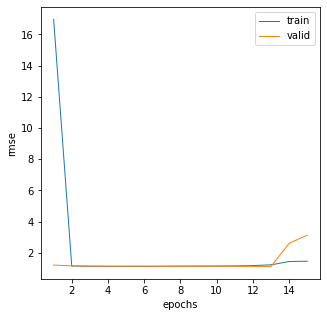

In [14]:
from recommenders.utils import plot

train_loss = [16.9591, 1.15782, 1.14264, 1.13661, 1.1357, 1.1377, 1.1414, 1.1505, 1.1534, 1.1589,
              1.1657,  1.1856, 1.2351, 1.4465, 1.4646]
valid_loss = [1.21742, 1.16880,   1.152, 1.149,  1.14756, 1.1450, 1.1426, 1.1429, 1.1434, 1.1401, 
               1.1391, 1.1373, 1.1311, 2.6162, 3.1366]
x = range(1,16)
plot.line_graph(
    values=[list(zip(train_loss,x)), list(zip(valid_loss,x))],
    labels=['train','valid'],
    x_name='epochs',
    y_name='rmse',
    legend_loc='upper right'
)

### TensorBoard

Once the train is done, you can browse the details of the training results as well as the metrics we logged from [TensorBoard](https://www.tensorflow.org/guide/summaries_and_tensorboard).

[]()|[]()
:---:|:---:
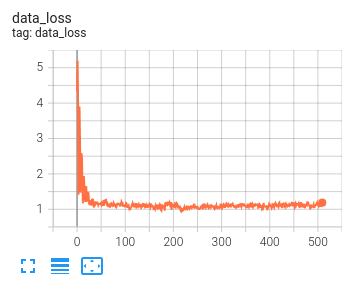|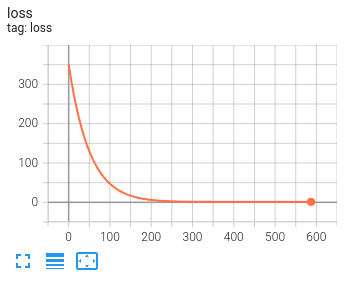

To open the TensorBoard, open a terminal from the same directory of this notebook, run `tensorboard --logdir=model_checkpoints`, and open http://localhost:6006 from a browser.


### Save the model

In [18]:
import os

model_path = os.path.join(MODEL_DIR, 'epoch_12')
model.saver.save(sess=model.sess, save_path=model_path)

'/home/shiv/Documents/DataScience/Capstone/Modeling/xdeepfm/model/epoch_12'

<a id="model_serving"></a>
### Model Serving

In [10]:
import os
import pickle
import pandas as pd
from tempfile import TemporaryDirectory
from tqdm import tqdm

from recommenders.utils.constants import (
    DEFAULT_USER_COL as USER_COL,
    DEFAULT_ITEM_COL as ITEM_COL,
    DEFAULT_RATING_COL as RATING_COL,
    DEFAULT_GENRE_COL as ITEM_FEAT_COL,
    DEFAULT_PREDICTION_COL as PREDICT_COL,
    DEFAULT_K,
    DEFAULT_THRESHOLD    
)
import recommenders.evaluation.python_evaluation as evaluator

model_path = os.path.join(MODEL_DIR, 'epoch_12')

hparams.load_saved_model = model_path
hparams.batch_size = 20*51
hparams.pairwise_metrics = ['ndcg@10', 'hit@10']

model = XDeepFMModel(hparams, FFMTextIterator, seed=SEED)
model.load_model()

Add linear part.
Add CIN part.
Add DNN part.


/home/shiv/anaconda3/envs/capstone/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/XDeepFM/embedding/embedding_lookup_sparse/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/XDeepFM/embedding/embedding_lookup_sparse/GatherV2_grad/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradients/XDeepFM/embedding/embedding_lookup_sparse/GatherV2_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-08-17 21:08:09.770982: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-17 21:0

#### Rating metrics (rmse) on test_file

In [13]:
# res_real = model.run_eval(test_file)
# print(res_real) # 1.1891173 Note that it the same result as above for the best model

#### Ranking metrics (NDCG@10, Hit@10) for users from the test file

In [25]:
import numpy as np
from recommenders.models.deeprec.deeprec_utils import cal_metric

NUM_NEG_SAMPLES = 50

load_sess = model.sess
# preds = []
# labels = []
group_preds = []
# group_labels = []
group = NUM_NEG_SAMPLES + 1

for i in range(5):
    rec_cnt = 0
    tst_file_w_neg = DATA_DIR + f'amzn_e_tst_w_neg{i}.txt'
    print()
    print(tst_file_w_neg, end='')
    for batch_data_input, _, data_size in model.iterator.load_data_from_file(tst_file_w_neg):
        assert(data_size % group == 0)
        step_pred, step_labels = model.eval(load_sess, batch_data_input)
        # preds.extend(np.reshape(step_pred, -1))
        # labels.extend(np.reshape(step_labels, -1))
        group_preds.extend(np.reshape(step_pred, (-1, group)))
        # group_labels.extend(np.reshape(step_labels, (-1, group)))

        rec_cnt += data_size/group
        if rec_cnt%10_000 == 0:
            if rec_cnt%100_000 == 0:
                print('!', end='')
            else:
                print('*', end='')


/home/shiv/Documents/DataScience/Capstone/Data/xdeepfm/amzn_e_tst_w_neg0.txt*********!
/home/shiv/Documents/DataScience/Capstone/Data/xdeepfm/amzn_e_tst_w_neg1.txt*********!
/home/shiv/Documents/DataScience/Capstone/Data/xdeepfm/amzn_e_tst_w_neg2.txt*********!
/home/shiv/Documents/DataScience/Capstone/Data/xdeepfm/amzn_e_tst_w_neg3.txt*********!
/home/shiv/Documents/DataScience/Capstone/Data/xdeepfm/amzn_e_tst_w_neg4.txt*********!

In [48]:
NDCG = 0.0
HT = 0.0
for each_preds in group_preds:
    predictions = np.array(each_preds)
    predictions = -1.0 * predictions

    # print(predictions)
    # print(predictions.argsort())    
    rank = predictions.argsort().argsort()[0]
    if rank < 10:
        NDCG += 1 / np.log2(rank + 2)
        HT += 1
NDCG/len(group_preds),HT/len(group_preds)

(0.18814342934817319, 0.34967027875148565)

### Top K for a user across all products

In [11]:
# Read the original reviews data frame (same as the one used by wide_deep model)
data = pd.read_csv(AMZN_DATA_DIR + 'wide_deep/Electronics/wide_deep_amzn_e_20.csv',
                   header=None, low_memory=False)
data.columns = [USER_COL,ITEM_COL,RATING_COL,ITEM_FEAT_COL,
                'unixTimeStamp','title','price','main_cat','category']
data.sort_values('unixTimeStamp', inplace=True)
data.reset_index(inplace=True, drop=True)

In [12]:
users = data.drop_duplicates(USER_COL)[[USER_COL]].reset_index(drop=True)
print("# users", users.shape[0])

# Ignore items already seen (makes sense for movies but Amazon products???
items = data.drop_duplicates(ITEM_COL)[[ITEM_COL, ITEM_FEAT_COL, 'title']].reset_index(drop=True)
print("# items", items.shape[0])

# users 830668
# items 63725


In [13]:
# Find the user with the most reviews
data_grp = data[[USER_COL, ITEM_COL]].groupby(USER_COL, as_index=False).count()
data_grp.sort_values(ITEM_COL, ascending=False, inplace=True)
data_grp.head(5)

,userID,itemID
8009,8009,324
2347,2347,243
35258,35258,238
1522,1522,236
63007,63007,232


In [14]:
# Read the feature index and field index pickle files
with open(DATA_DIR + 'feat_index.pkl', 'rb') as f:
    feat_index = pickle.load(f)
with open(DATA_DIR + 'field_index.pkl', 'rb') as f:
    field_index = pickle.load(f)
    
# Prepare the feature columns (both numeric as well as categorical)
cols = [USER_COL, ITEM_COL]
with open(DATA_DIR + 'lst_genres.pkl', 'rb') as f:
    lst_genres = pickle.load(f)
for genre in lst_genres:
    cols.append(genre)
print(cols)

['userID', 'itemID', 'Accessories', 'Accessories & Supplies', 'All Electronics', 'Amazon Devices', 'Apple Products', 'Audio & Video Accessories', 'Automotive', 'Camera & Photo', 'Car & Vehicle Electronics', 'Car Electronics', 'Cell Phones & Accessories', 'Clothing, Shoes & Jewelry', 'Computer Accessories & Peripherals', 'Computer Components', 'Computers', 'Computers & Accessories', 'Controllers', 'Electrical', 'Electronics', 'GPS & Navigation', 'Home & Kitchen', 'Home Audio', 'Home Audio & Theater', 'Industrial & Scientific', 'Laptop Accessories', 'Musical Instruments', 'Office & School Supplies', 'Office Electronics', 'Office Products', 'Portable Audio & Accessories', 'Portable Audio & Video', 'Sports & Fitness', 'Sports & Outdoors', 'Tools & Home Improvement', 'Toys & Games', 'Video Games']


#### Prepare to output the dataframe with the predicted score, title and category of items unseen by user 8009

In [15]:
tmp_dir = TemporaryDirectory()

train = pd.read_csv(train_file, sep=' ', header=None)
train.columns = ['label'] + cols

all_items_set = set()
rev_item_lookup = {} # dictionary for reverse lookup of title and genre
for _, row in items.iterrows():
    i = row[ITEM_COL]
    item_feat_ffm = str(field_index[ITEM_COL]) + ':' + str(feat_index['item#' + str(i)]) + ':1'
    rev_item_lookup[item_feat_ffm] = {'title': row['title'], 'genre': row[ITEM_FEAT_COL]}
    all_items_set.add(item_feat_ffm)
    
items_df = train.drop_duplicates([ITEM_COL]).copy()
items_df.drop(columns=['label', USER_COL], inplace=True)
items_df.set_index(ITEM_COL, inplace=True) # for fast lookup
# items_df

In [16]:
# Note: Choose the first user from the data_grp

user = data_grp.iloc[0]['userID']
user_feat_ffm = str(field_index[USER_COL]) + ':' + str(feat_index['user#' + str(user)]) + ':1'

tmp_df = train[train[USER_COL]==user_feat_ffm]
items_rated_set = set(tmp_df[ITEM_COL].values)

items_not_seen = all_items_set - items_rated_set
lst_items_not_seen = list(items_not_seen)

In [17]:
test_nolabel = tmp_dir.name + '/amzn_test_no_label.txt'
out = open(test_nolabel, 'w')

it_cnt = 0
for it in lst_items_not_seen:

    tmp_df = items_df.loc[it]
    assert(tmp_df.shape[0] != 0) # all items are present in the train dataframe
    
    feats = []
    feats.append(str(5.0)) # unused
    feats.append(user_feat_ffm)
    feats.append(it)
    it_cat_feats = list(tmp_df.values)
    feats.extend(it_cat_feats)
    out.write(' '.join(feats) + '\n')

    it_cnt += 1
    if it_cnt % 1000 == 0:
        print('*', end='')

out.close()

print()
print(f'Predicting for user {user}, # unseen items {it_cnt}')
outfile = tmp_dir.name + '/amzn_out.txt'
model.predict(test_nolabel, outfile);

***************************************************************
Predicting for user 8009, # unseen items 63478


2022-08-17 21:08:51.901167: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-08-17 21:08:51.991854: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8301


#### Output the predicted score, title, and category/genre of the item in a csv file

In [18]:
inp_df = pd.read_csv(test_nolabel, sep=' ', header=None)
inp_df.columns = ['label'] + cols
res_df = pd.read_csv(outfile, header=None)
res_df.columns = ['prediction']
res_df[ITEM_COL] = inp_df[ITEM_COL]
res_df['title'] = res_df[ITEM_COL].map(lambda x: rev_item_lookup[x]['title'])
res_df[ITEM_FEAT_COL] = res_df[ITEM_COL].map(lambda x: rev_item_lookup[x][ITEM_FEAT_COL])
# res_df.drop(columns = [ITEM_COL], inplace=True)
res_df.sort_values('prediction', ascending=False, inplace=True)
res_df.reset_index(inplace=True, drop=True)

res_df.to_csv(DATA_DIR + f'output_{user}.csv', index=False) # header = True
res_df.head(10)

,prediction,itemID,title,genre
0,4.844718,2:290898:1,"Scott 75143 Scott Shop Towels, Blue (3 Rolls, ...",Industrial & Scientific|Automotive
1,4.839595,2:484728:1,", ( ) - Masha and the Bear, moving arms an...",Cell Phones & Accessories
2,4.837112,2:137170:1,FW1 Cleaner With Carnauba Wax by RGS Labs (17....,Industrial & Scientific|Automotive
3,4.824506,2:654182:1,DROK Reusable 30 Pcs Adhesive Fastening Cable ...,Industrial & Scientific|Electronics|Accessorie...
4,4.811943,2:231554:1,E-Z Grader Grading Calculator Teacher's Aid Sc...,Industrial & Scientific|Office Products|Office...
5,4.800133,2:700428:1,APPLE IPHONE 4 & 4S AT&T Verizon Sprint FAIRY ...,Cell Phones & Accessories
6,4.797705,2:120076:1,"Breeze Power-Seal Stainless Steel Hose Clamp, ...",Industrial & Scientific|Automotive
7,4.792131,2:571597:1,IKEA BEKVAM Wooden Utility Step by Ikea (Beige),Industrial & Scientific|Office Products
8,4.791570,2:649346:1,Apache 99023587 3700 PSI 100' Steel Pressure W...,Industrial & Scientific|Tools & Home Improvement
9,4.790825,2:860620:1,"MagicFiber Microfiber Cleaning Cloths, 30 PACK",Camera & Photo|Electronics|Accessories


## Reference
\[1\] Lian, J., Zhou, X., Zhang, F., Chen, Z., Xie, X., & Sun, G. (2018). xDeepFM: Combining Explicit and Implicit Feature Interactions for Recommender Systems. Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery \& Data Mining, KDD 2018, London, UK, August 19-23, 2018.<br>